# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#%matplotlib notebook

In [3]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]

    return tt, y

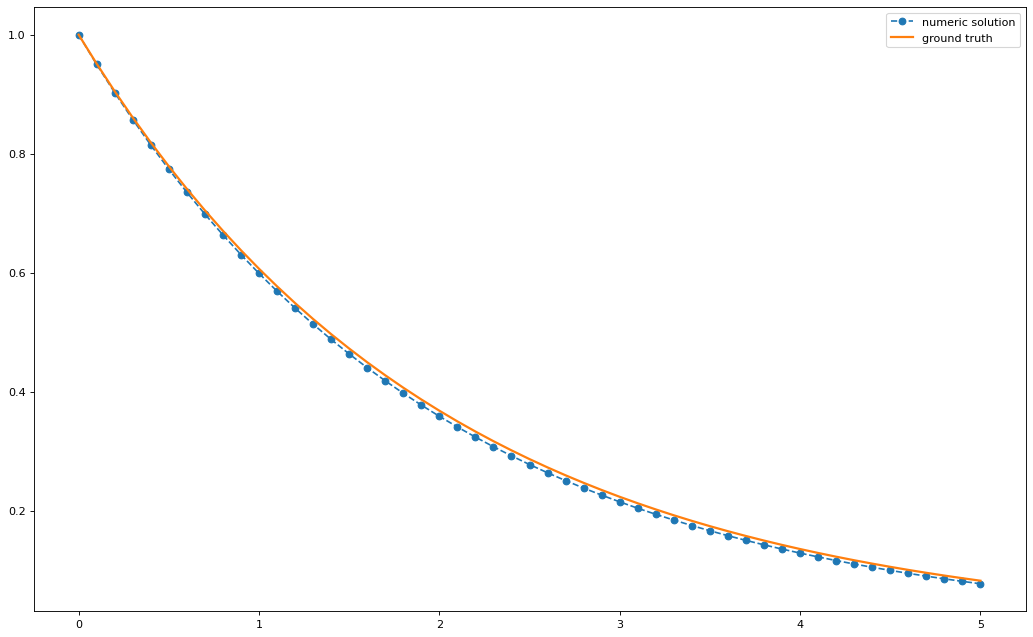

In [4]:
def visualize(dt=0.1):
    lam = -0.5
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=dt)
    figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(tt, y, 'o--', label='numeric solution')
    plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
    plt.legend(loc='best')
    plt.show()

visualize()

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

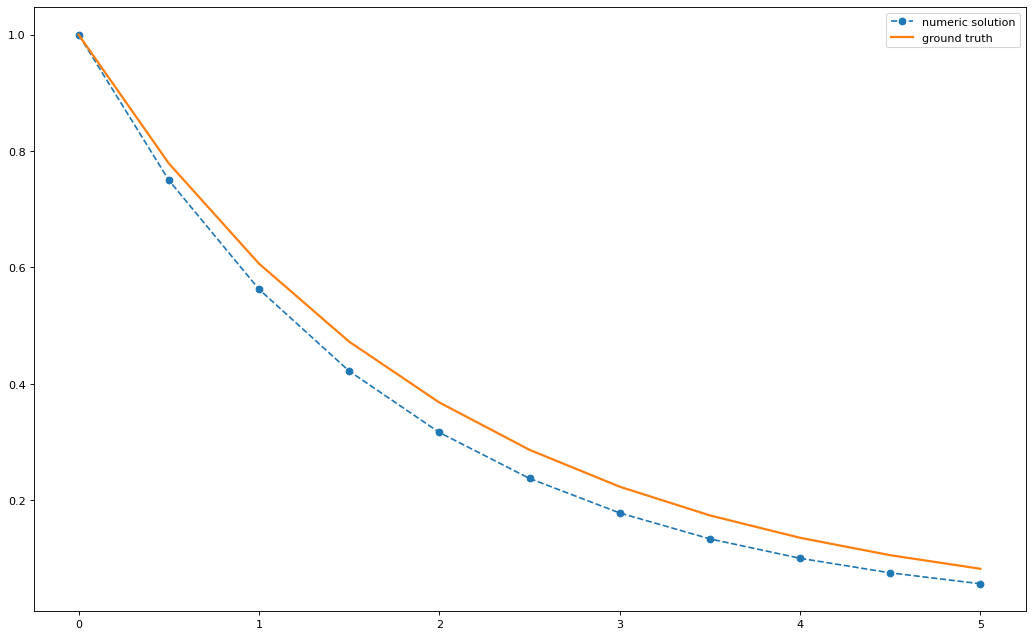

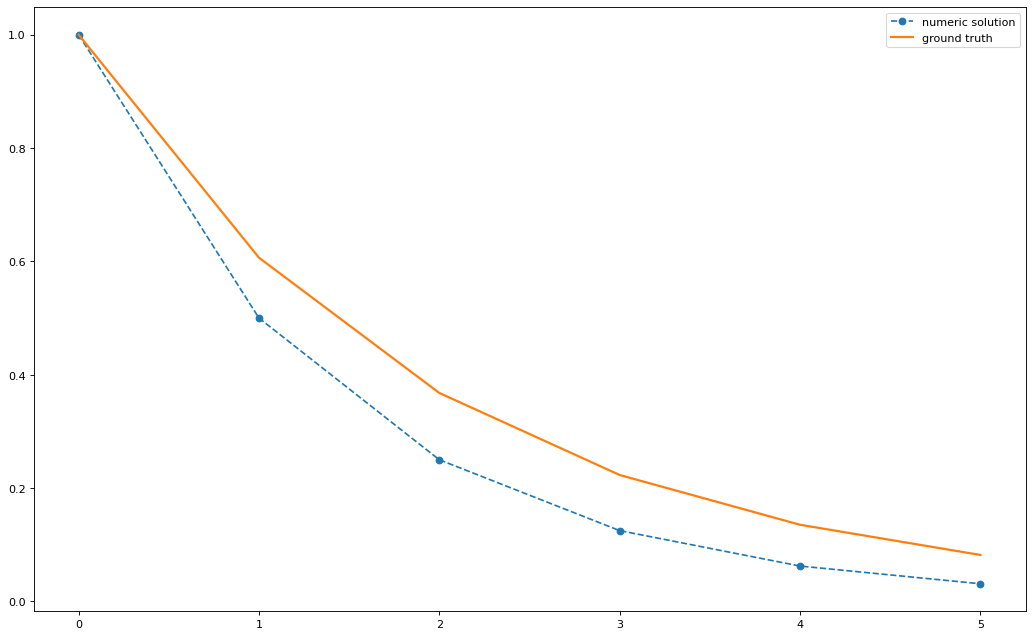

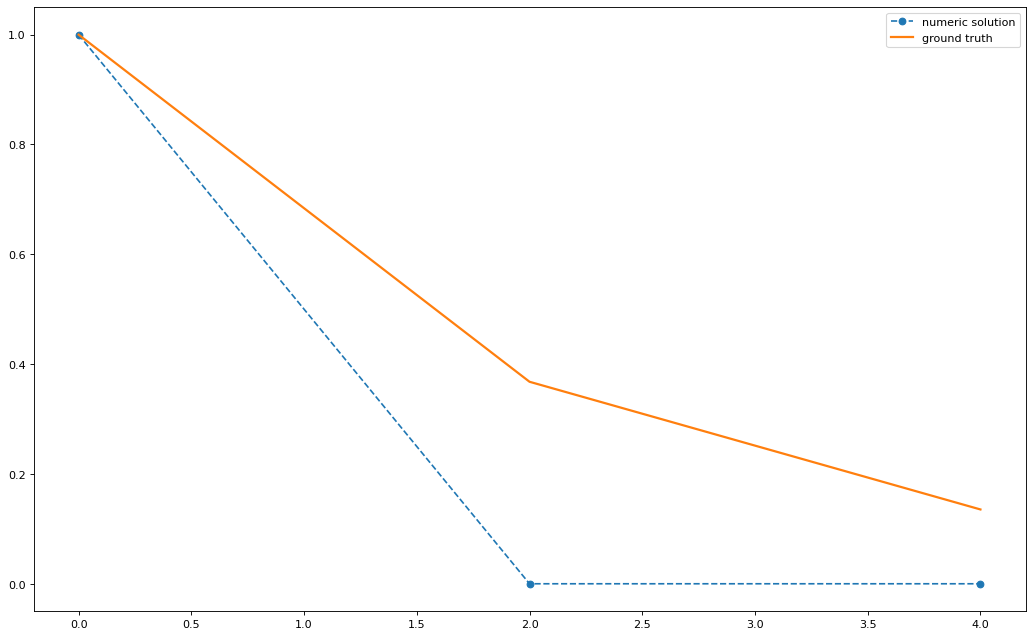

In [5]:
tau = [0.5, 1, 2]

visualize(tau[0])
visualize(tau[1])
visualize(tau[2])

<b>Summary</b>: Seen obvious degradation with increase of dt. It is associated due to small discretization.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)


### Well, let's disscuss why implicit method is special?
The reason is that, it uses current derivative. So, at each iteration we need to solve fixed point iteration problem

In [6]:
from scipy.optimize import fixed_point

def implicit_euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0

    for k in range(num_steps):
        func = lambda x: y[k] + lam * dt * x
        y[k+1] = fixed_point(func, 100)

    return tt, y

In [7]:
lam = -0.5
dt=0.1
tt, y = implicit_euler_solve(lam, u0=1.0, T=5, dt=dt)

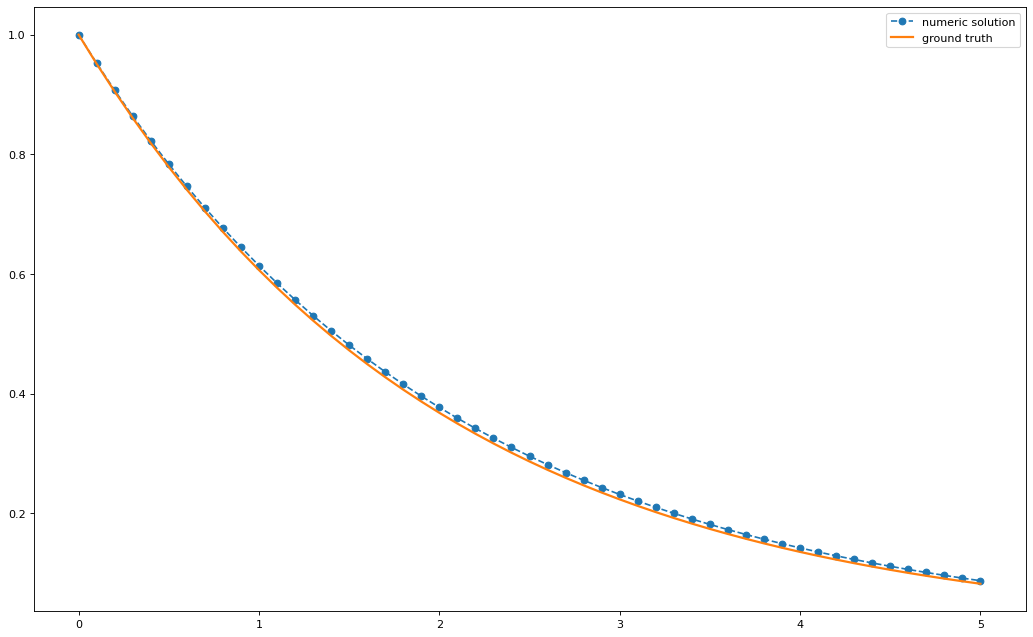

In [19]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.show()

<b>Summary</b>: During the research found out that Implicit method is more robust

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [71]:
from scipy.optimize import fixed_point

def euler_solve_matrix(A, u0, dt, eps=1e-7):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    
    y = []
    y.append(u0)
    
    k = 0
    prev_error = np.sum(np.abs(u0))
    while k < 10000:
        current_error = np.sum(np.abs(y[k] - y[k-1]))
        if np.abs(current_error - prev_error) > eps:
            print(f"{k} | Error: {current_error}")
            prev_error = current_error
        else:
            print(f"{k} | Finish convergence")
            if current_error > eps:
                print(f"{k} | System has't converged")
            else:
                print(f"{k} | System has converged")
            break
        y.append((A @ y[k]) * dt)
        k += 1

    return y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [72]:
A = np.array([[-10, 10],[32, -499]])
u = np.array([1, 0])

max_eigen = np.max(np.linalg.eigvals(A))
min_eigen = np.min(np.linalg.eigvals(A))
s = max_eigen/min_eigen
s

0.01870591567136658

In [73]:
tao = 0.01
y = euler_solve_matrix(A, u, tao)

0 | Error: 0
1 | Error: 1.4200000000000002
2 | Error: 2.0908
3 | Error: 9.979032000000002
4 | Error: 49.81686928000001
5 | Error: 248.90765669120012
6 | Error: 1243.6754946044487
7 | Error: 6214.068391861854
8 | Error: 31048.811658596565
9 | Error: 155136.48140325706
10 | Error: 775144.8952980137
11 | Error: 3873038.780251569
12 | Error: 19351774.72537631
13 | Error: 96691824.24178797
14 | Error: 483124106.59395
15 | Error: 2413946620.642291
16 | Error: 12061369341.289886
17 | Error: 60265056875.32557
18 | Error: 301116480013.0248
19 | Error: 1504539101705.5193
20 | Error: 7517482631515.011
21 | Error: 37561366833914.92
22 | Error: 187676692795709.5
23 | Error: 937733208018723.0
24 | Error: 4685417013279703.0
25 | Error: 2.341085118944895e+16
26 | Error: 1.1697314280909355e+17
27 | Error: 5.844604293928136e+17
28 | Error: 2.920277127917574e+18
29 | Error: 1.4591267560574007e+19
30 | Error: 7.29057824645842e+19
31 | Error: 3.6427631079394555e+20
32 | Error: 1.820119421530222e+21
33 | Er

<ipython-input-71-5ca964e88cd4>:23: RuntimeWarning: overflow encountered in matmul
  y.append((A @ y[k]) * dt)
<ipython-input-71-5ca964e88cd4>:13: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(current_error - prev_error) > eps:


### Wow, I was wrong. The system with step size 0.01 system is't stable.
### So, lets try to reduce step size

In [107]:
tao = 0.001
y = euler_solve_matrix(A, u, tao)

0 | Error: 0
1 | Error: 1.042
2 | Error: 0.058707999999999996
3 | Error: 0.025016232000000003
4 | Error: 0.012459095728
5 | Error: 0.006224853922112001
6 | Error: 0.003110266669305249
7 | Error: 0.0015540556668601087
8 | Error: 0.00077648938908614
9 | Error: 0.00038797565908060854
10 | Error: 0.0001938534050249975
11 | Error: 9.685953682981728e-05
12 | Error: 4.8396208844910247e-05
13 | Error: 2.4181336265064067e-05
14 | Error: 1.208228986361188e-05
15 | Error: 6.036958700220597e-06
16 | Error: 3.016387684749216e-06
17 | Error: 1.507148734407321e-06
18 | Error: 7.530521753255477e-07
19 | Error: 3.7626517265102156e-07
20 | Error: 1.8800221922059966e-07
21 | Finish convergence
21 | System has converged


In [108]:
y

[array([1, 0]),
 array([-0.01 ,  0.032]),
 array([ 0.00042 , -0.016288]),
 array([-0.00016708,  0.00814115]),
 array([ 8.30823200e-05, -4.06778141e-03]),
 array([-4.15086373e-05,  2.03248156e-03]),
 array([ 2.07399019e-05, -1.01553657e-03]),
 array([-1.03627648e-05,  5.07416427e-04]),
 array([ 5.17779192e-06, -2.53532406e-04]),
 array([-2.58710197e-06,  1.26678360e-04]),
 array([ 1.29265462e-06, -6.32952887e-05]),
 array([-6.45879434e-07,  3.16257140e-05]),
 array([ 3.22715935e-07, -1.58018994e-05]),
 array([-1.61246154e-07,  7.89547473e-06]),
 array([ 8.05672089e-08, -3.94500177e-06]),
 array([-4.02556898e-08,  1.97113403e-06]),
 array([ 2.01138972e-08, -9.84884065e-07]),
 array([-1.00499796e-08,  4.92100793e-07]),
 array([ 5.02150773e-09, -2.45879895e-07]),
 array([-2.50901403e-09,  1.22854756e-07]),
 array([ 1.25363770e-09, -6.13848116e-08]),
 array([-6.26384493e-10,  3.06711374e-08])]

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [109]:
def euler_implicit_solve_matrix(A, u0, dt, eps=1e-7):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    
    y = []
    y.append(u0)
    
    k = 0
    prev_error = np.sum(np.abs(u0))
    while k < 10000:
        current_error = np.sum(np.abs(y[k] - y[k-1]))
        if np.abs(current_error - prev_error) > eps:
            print(f"{k} | Error: {current_error}")
            prev_error = current_error
        else:
            print(f"{k} | Finish convergence")
            if current_error > eps:
                print(f"{k} | System has't converged")
            else:
                print(f"{k} | System has converged")
            break
        y.append(np.linalg.solve(A, A @ y[k])*dt)
        k += 1

    return y

In [111]:
tao = 0.001
y = euler_implicit_solve_matrix(A, u, tao)

0 | Error: 0
1 | Error: 0.999
2 | Error: 0.000999
3 | Error: 9.989999999999999e-07
4 | Error: 9.99e-10
5 | Finish convergence
5 | System has converged


# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

## Wow, that will take to much time from me. I'm give up from here

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)